# Adaptive PMC ABC
This example shows you how to perform adaptive PMC ABC on a time series from the stochastic degradation model.


In [1]:
import pints
import pints.toy as toy
import pints.plot
import pints.toy.stochastic
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.stochastic.DegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 20)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior([0.0], [0.3])


# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

## Fit using Rejection ABC

In [2]:
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCAdaptivePMC)

# set threshold
abc.sampler().set_N_l(500)

# set p_acc_min
abc.sampler().set_p_acc_min(0.05)

# set target number of samples
abc.set_nr_samples(1000)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using ABC-Adaptive-PMC
Running in sequential mode.
w_mean=[0.11212175]
epsilon=3.2015621187164243
w_mean=[0.0893372]
epsilon=2.5
w_mean=[0.08329601]
epsilon=2.0856653614614213
w_mean=[0.08467868]
epsilon=1.9364916731037085
w_mean=[0.0883514]
epsilon=1.8027756377319946
w_mean=[0.09021226]
epsilon=1.7175564037317668
w_mean=[0.08991807]
epsilon=1.6278820596099708
w_mean=[0.08936077]
epsilon=1.5652475842498528
w_mean=[0.09022857]
epsilon=1.5
w_mean=[0.08970022]
epsilon=1.466287829861518
w_mean=[0.09274376]
epsilon=1.4317821063276355
w_mean=[0.0922629]
epsilon=1.3964240043768943
w_mean=[0.09219266]
epsilon=1.3601470508735443
w_mean=[0.08988965]
epsilon=1.3416407864998738
w_mean=[0.09245017]
Iter. Eval. Acceptance rate Time m:s
1     16     25.125           1:48.6
Halting: target number of samples (402) reached.
Done


## Plot approximate posterior vs actual parameter value

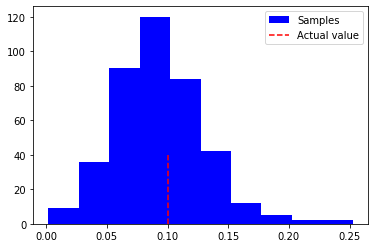

In [3]:
plt.hist(samples[:,0], color="blue", label="Samples")
plt.vlines(x=model.suggested_parameters(), linestyles='dashed', ymin=0, ymax=40, label="Actual value", color="red")
plt.legend()
plt.show()